In [1]:
## 1.Load and visualize dataset (optional PCA for 2D view).
## 2.Fit K-Means and assign cluster labels.
## 3.Use the Elbow Method to find optimal K.
## 4.Visualize clusters with color-coding.
## 5.Evaluate clustering using Silhouette Score.

In [2]:
# Load the Data.

import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\prati\Downloads\archive (9)\Mall_Customers.csv")

# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Select relevant features for clustering.

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
# Standardize the Data.

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
# Optional Apply PCA for 2D Visualization.

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.53710920e+00, -9.22207047e-01],
       [-3.84167666e-01, -2.07514858e+00],
       [-2.41600197e+00,  1.06654468e-02],
       [-4.66981759e-01, -1.93835476e+00],
       [-1.45567848e+00, -8.95678311e-01],
       [-4.67442886e-01, -1.88391391e+00],
       [-2.36202224e+00,  6.46451712e-02],
       [ 5.36647757e-02, -2.35104185e+00],
       [-2.41738535e+00,  1.73988000e-01],
       [-5.23267116e-01, -1.72013023e+00],
       [-2.11542447e+00, -1.27972877e-01],
       [ 2.17909582e-01, -2.46130693e+00],
       [-2.06098362e+00, -1.28434004e-01],
       [-3.59022310e-01, -1.83039531e+00],
       [-2.11588560e+00, -7.35320262e-02],
       [-3.04120332e-01, -1.88529729e+00],
       [-1.48497398e+00, -6.50463918e-01],
       [-6.33993325e-01, -1.50144457e+00],
       [-1.59570019e+00, -4.31778261e-01],
       [ 2.98418042e-01, -2.32589649e+00],
       [-1.40400439e+00, -5.69494332e-01],
       [-3.60866817e-01, -1.61263191e+00],
       [-2.20054420e+00,  2.81025195e-01],
       [-3.

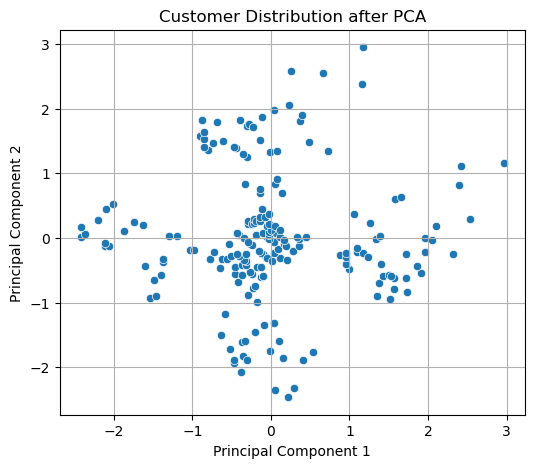

In [11]:
# Plot the PCA Result.

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize PCA output
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('Customer Distribution after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [13]:
## 2.Fit K-Means and assign cluster labels.

from sklearn.cluster import KMeans
# Choose the number of clusters
k = 5

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and predict clusters
cluster_labels = kmeans.fit_predict(X_scaled)
cluster_labels


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [14]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Show a few rows
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


In [15]:
# Cluster centers in scaled space
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)


Cluster Centers (scaled):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [16]:
# Convert centers back to original scale
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):")
print(centers_original)


Cluster Centers (original scale):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [19]:
## 3.Use the Elbow Method to find optimal K.

K_range = range(1, 11)  # Trying K from 1 to 10
K_range

range(1, 11)

In [23]:
sse = []  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit the model to scaled data
    sse.append(kmeans.inertia_)  # Append inertia (SSE)
sse

C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

[400.0,
 273.6688866264201,
 157.70400815035947,
 109.22822707921344,
 65.56840815571681,
 60.13287487193422,
 49.668244837367986,
 37.319122878338824,
 32.49508119910091,
 30.05932269404221]

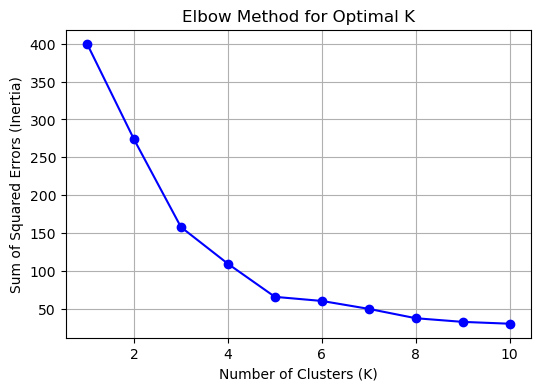

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(K_range, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


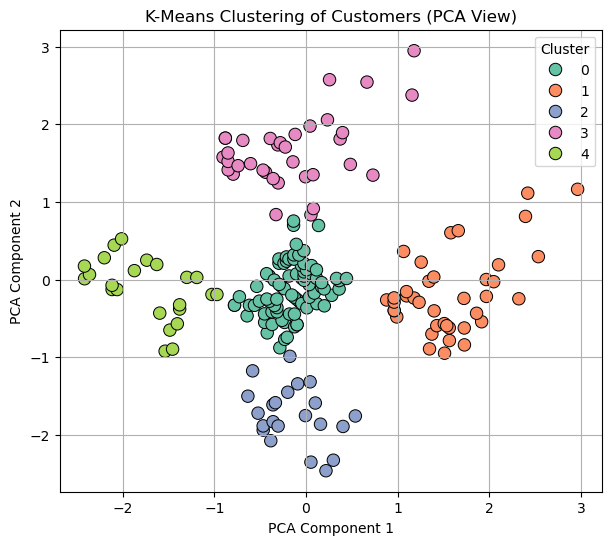

In [25]:
## 4.Visualize clusters with color-coding.

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the PCA-transformed data with cluster labels
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], 
    hue=cluster_labels, 
    palette='Set2', 
    s=80, 
    edgecolor='black'
)

plt.title('K-Means Clustering of Customers (PCA View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [26]:
## 5.Evaluate clustering using Silhouette Score.

from sklearn.metrics import silhouette_score
# X_scaled: standardized input features
# cluster_labels: output from KMeans

score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {score:.3f}")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score = {sil_score:.3f}")




Silhouette Score: 0.555


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=2, Silhouette Score = 0.397


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=3, Silhouette Score = 0.467


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=4, Silhouette Score = 0.494


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=5, Silhouette Score = 0.555


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=6, Silhouette Score = 0.514


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=7, Silhouette Score = 0.502


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=8, Silhouette Score = 0.455
K=9, Silhouette Score = 0.457


C:\Users\prati\anaconda37\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=10, Silhouette Score = 0.445
